In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pylab
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
from PIL import Image
%matplotlib inline

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, concatenate, Input, Flatten, Activation, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive
import time
import math



In [ ]:
#Диалог ВК был выгружен в виде архива, где каждая страница шла отдельным файлом txt.
#Поэтому предварительно файлы были соединены в один в Windows PowerShell с помощью команды cmd/c copy 'путь файла\1.txt' + 'путь файла\2.txt'  'путь файла\3.txt'

In [ ]:
text = open('drive/MyDrive/Нейросети/messages.txt', 'r')
print(text.read())

In [3]:
cur_time = time.time()
maxWordsCount = 71000

tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeffqwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM', lower=True, split=' ', oov_token='unknown', char_level=False)


In [ ]:
#Далее нужно было разделить файл по спикерам и сформировать отдельные файлы

In [4]:
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read()
  text = text.replace("\n", " ")

  return text

className = ('Speaker1', 'Speaker2', 'Speaker3', 'Speaker4')
nClasses = len(className)

In [5]:
data = readText('drive/MyDrive/Нейросети/messages.txt').split(',')

all = {}
for i in className:
  all[i] = []
  for j in data:
    if i in j:
      all[i].append(j)


for i in all:
  with open(f'{i}.txt', 'w') as file:
        for j in all[i]:
          file.write(j+"\n")

In [6]:
pip install aspose-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 MB 8.4 MB/s eta 0:00:00


In [ ]:
#Для обучения нейросети надо было также поделить каждый сформированный файл спикера на два: обучающую и тестовую выборки

In [7]:
import math
import itertools


def openfile(filename):
    with open(filename) as file_:
        for i in file_:
            yield i.strip()


def file_split(filename, parts):

    all_str = sum(1 for i in open('Speaker1.txt', 'r'))
    count = math.ceil(all_str / parts)

    offset = 0
    chunks = []
    for i in range(parts):
        file_ = openfile('Speaker1.txt')
        chunks.append((itertools.islice(file_, offset, offset + count)))
        offset += count

    return chunks


def write_chunks(filename, chunks):
    for index, data in enumerate(chunks):
        with open('{}-{}.txt'.format('Speaker1.txt', index), 'w') as out:
            list(map(lambda line: out.write('{}\n'.format(line)), data))


target = ['file1.txt', 'file2.txt', 'file3.txt', 'file4.txt', 'file5.txt', 'file6.txt']
for i in target:
    chunks = file_split(i, 6)
    write_chunks(i, chunks)

In [8]:
filenames = ['Speaker1.txt-0.txt', 'Speaker1.txt-1.txt', 'Speaker1.txt-2.txt', 'Speaker1.txt-3.txt']
with open('/content/Speaker1_Обучающая', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [9]:
def openfile(filename):
    with open(filename) as file_:
        for i in file_:
            yield i.strip()


def file_split(filename, parts):

    all_str = sum(1 for i in open('Speaker2.txt', 'r'))
    count = math.ceil(all_str / parts)

    offset = 0
    chunks = []
    for i in range(parts):
        file_ = openfile('Speaker2.txt')
        chunks.append((itertools.islice(file_, offset, offset + count)))
        offset += count

    return chunks


def write_chunks(filename, chunks):
    for index, data in enumerate(chunks):
        with open('{}-{}.txt'.format('Speaker2.txt', index), 'w') as out:
            list(map(lambda line: out.write('{}\n'.format(line)), data))


target = ['file1.txt', 'file2.txt', 'file3.txt', 'file4.txt', 'file5.txt', 'file6.txt']
for i in target:
    chunks = file_split(i, 6)
    write_chunks(i, chunks)

In [10]:
filenames = ['Speaker2.txt-0.txt', 'Speaker2.txt-1.txt', 'Speaker2.txt-2.txt', 'Speaker2.txt-3.txt']
with open('/content/Speaker2_Обучающая', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [11]:
def openfile(filename):
    with open(filename) as file_:
        for i in file_:
            yield i.strip()


def file_split(filename, parts):

    all_str = sum(1 for i in open('Speaker3.txt', 'r'))
    count = math.ceil(all_str / parts)

    offset = 0
    chunks = []
    for i in range(parts):
        file_ = openfile('Speaker3.txt')
        chunks.append((itertools.islice(file_, offset, offset + count)))
        offset += count

    return chunks


def write_chunks(filename, chunks):
    for index, data in enumerate(chunks):
        with open('{}-{}.txt'.format('Speaker3.txt', index), 'w') as out:
            list(map(lambda line: out.write('{}\n'.format(line)), data))


target = ['file1.txt', 'file2.txt', 'file3.txt', 'file4.txt', 'file5.txt', 'file6.txt']
for i in target:
    chunks = file_split(i, 6)
    write_chunks(i, chunks)

In [12]:
filenames = ['Speaker3.txt-0.txt', 'Speaker3.txt-1.txt', 'Speaker3.txt-2.txt', 'Speaker3.txt-3.txt']
with open('/content/Speaker3_Обучающая', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [13]:
def openfile(filename):
    with open(filename) as file_:
        for i in file_:
            yield i.strip()


def file_split(filename, parts):

    all_str = sum(1 for i in open('Speaker4.txt', 'r'))
    count = math.ceil(all_str / parts)

    offset = 0
    chunks = []
    for i in range(parts):
        file_ = openfile('Speaker4.txt')
        chunks.append((itertools.islice(file_, offset, offset + count)))
        offset += count

    return chunks


def write_chunks(filename, chunks):
    for index, data in enumerate(chunks):
        with open('{}-{}.txt'.format('Speaker4.txt', index), 'w') as out:
            list(map(lambda line: out.write('{}\n'.format(line)), data))


target = ['file1.txt', 'file2.txt', 'file3.txt', 'file4.txt', 'file5.txt', 'file6.txt']
for i in target:
    chunks = file_split(i, 6)
    write_chunks(i, chunks)

In [14]:
filenames = ['Speaker4.txt-0.txt', 'Speaker4.txt-1.txt', 'Speaker4.txt-2.txt', 'Speaker4.txt-3.txt']
with open('/content/Speaker4_Обучающая', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [15]:
trainText = []
testText = []


for i in className:
  for j in os.listdir('/content/'):
    if i in j:

      if 'Обучающая' in j:
        trainText.append(readText('/content/' + j))
        print(j, 'добавлен в обучающую выборку')
      if 'txt-5' in j:
        testText.append(readText('/content/' + j))
        print(j, 'добавлен в тестовую выборку')
  print()

Speaker1_Обучающая добавлен в обучающую выборку
Speaker1.txt-5.txt добавлен в тестовую выборку

Speaker2.txt-5.txt добавлен в тестовую выборку
Speaker2_Обучающая добавлен в обучающую выборку

Speaker3.txt-5.txt добавлен в тестовую выборку
Speaker3_Обучающая добавлен в обучающую выборку

Speaker4.txt-5.txt добавлен в тестовую выборку
Speaker4_Обучающая добавлен в обучающую выборку



In [16]:
print(len(trainText))
print(len(trainText[0]))

4
67264


In [ ]:
#Преобразование текстовых данных в числовые и векторные для обучения нейросети

In [17]:

tokenizer.fit_on_texts(trainText)
items = list(tokenizer.word_index.items())
print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

Время обработки: 53.93c


In [ ]:
print(items[-10:])
print("Размер словаря", len(items))

In [19]:
print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("Уточните слово: ")])

Уточните слово: масла
Интересующее слово имеет индекс:  1471


In [ ]:
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)

print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[1][:2049])
print("Он же в виде последовательности индексов: ", trainWordIndexes[1][:1600], '\n')

In [21]:
tokenizer.texts_to_sequences(['масла'])

[[1471]]

In [22]:
print("Статистика по обучающим текстам:")

symbolsTrainText = 0
wordsTrainText = 0

for i in range(nClasses):
  print(className[i], " "*(10-len(className[i])), len(trainText[i]), "символов, ", len(trainWordIndexes[i]), "слов")
  symbolsTrainText += len(trainText[i])
  wordsTrainText += len(trainWordIndexes[i])

print('----')
print("В сумме ", symbolsTrainText, " символов, ", wordsTrainText, " слов \n")
print()
print("Статистика по тестовым текстам:")

symbolsTestText = 0
wordsTestText = 0

for i in range(nClasses):
  print(className[i], ' '*(10-len(className[i])), len(testText[i]), "символов, ", len(testWordIndexes[i]), "слов")
  symbolsTestText += len(testText[i])
  wordsTestText += len(testWordIndexes[i])
print('----')
print("В сумме ", symbolsTestText, " символов, ", wordsTestText, " слов")

Статистика по обучающим текстам:
Speaker1    67264 символов,  11779 слов
Speaker2    79529 символов,  13708 слов
Speaker3    41757 символов,  7686 слов
Speaker4    78460 символов,  13861 слов
----
В сумме  267010  символов,  47034  слов 


Статистика по тестовым текстам:
Speaker1    17614 символов,  3007 слов
Speaker2    16679 символов,  3031 слов
Speaker3    9648 символов,  1862 слов
Speaker4    17543 символов,  3225 слов
----
В сумме  61484  символов,  11125  слов


In [ ]:
#Создание обучающей и проверочной выборки

In [23]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0

  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step

  return xSample


def createSetsMultiClasses(wordIndexes, xLen, step):

  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))


  xSamples = []
  ySamples = []

  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))

  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)


  return (xSamples, ySamples)

#Подготовка данных

xLen = 800
step = 4


cur_time = time.time()

xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

(10961, 800)
(10961, 4)
(1983, 800)
(1983, 4)
Время обработки: 1.14c


In [ ]:
tokenizer.sequences_to_texts([xTrain[0][100:]])

In [ ]:
tokenizer.sequences_to_texts([xTrain[1]])

In [26]:
cur_time = time.time()

xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

print(xTrain01.shape)
print(xTrain01[0][0:100])
print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

(10961, 71000)
[0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0.]
Время обработки: 3.96c


In [27]:
for i in range(100):
  print(int(i in xTrain[0]),end=' ')

0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 

In [ ]:
#Нейросеть

In [39]:
trainDataGen = TimeseriesGenerator(xTrain, yTrain,
                               length=xLen, stride=1, sampling_rate=1,
                               batch_size=128)


testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, stride=1,
                               batch_size=128)

In [40]:
target_classes = ["Speaker1", "Speaker2", "Speaker3", "Speaker4"]

max_tokens=800

xTrain_pad = pad_sequences(xTrain, maxlen=max_tokens, padding="post", truncating="post", value=0)
xTest_pad  = pad_sequences(xTest , maxlen=max_tokens, padding="post", truncating="post", value=0)

xTrain_pad.shape, xTest_pad.shape


embed_len = 44
lstm_out = 44

model = Sequential([
                    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embed_len,  input_length=max_tokens),
                    LSTM(lstm_out),
                    Dense(len(target_classes), activation="softmax")
                ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 800, 44)           161920    
                                                                 
 lstm_1 (LSTM)               (None, 44)                15664     
                                                                 
 dense_1 (Dense)             (None, 4)                 180       
                                                                 
Total params: 177,764
Trainable params: 177,764
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss="mse", optimizer=Adam(learning_rate=1e-4))

history = model.fit(xTrain,
                    yTrain,
                    epochs=44,
                    batch_size=128,
                    validation_data=(xTest, yTest))

Epoch 1/44
86/86 [==============================] - 83s 918ms/step - loss: 0.1787 - val_loss: 0.1803
Epoch 2/44
86/86 [==============================] - 77s 902ms/step - loss: 0.1415 - val_loss: 0.1810
Epoch 3/44
86/86 [==============================] - 78s 903ms/step - loss: 0.0486 - val_loss: 0.1542
Epoch 4/44
86/86 [==============================] - 80s 930ms/step - loss: 0.0475 - val_loss: 0.1137
Epoch 5/44
86/86 [==============================] - 84s 985ms/step - loss: 0.0661 - val_loss: 0.1570
Epoch 6/44
86/86 [==============================] - 78s 899ms/step - loss: 0.0374 - val_loss: 0.1688
Epoch 7/44
86/86 [==============================] - 78s 907ms/step - loss: 0.0353 - val_loss: 0.1730
Epoch 8/44
86/86 [==============================] - 77s 894ms/step - loss: 0.0402 - val_loss: 0.1697
Epoch 9/44
86/86 [==============================] - 78s 904ms/step - loss: 0.0265 - val_loss: 0.2082
Epoch 10/44
86/86 [==============================] - 77s 892ms/step - loss: 0.0146 - val_lo

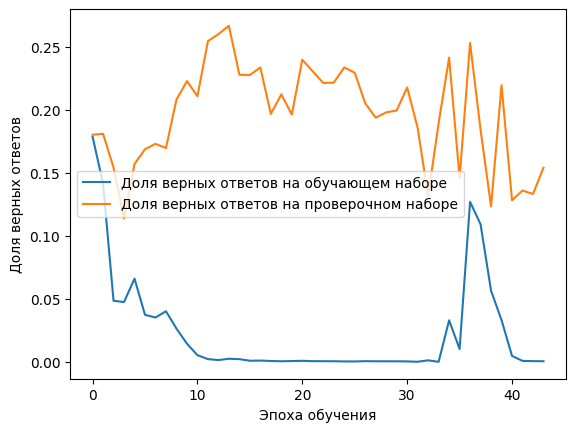

In [42]:
plt.plot(history.history['loss'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [43]:
model.save_weights('model.h5')

In [44]:
model.load_weights('model.h5')

In [ ]:
#Распознавание проверочной выборки

In [45]:
def createTestMultiClasses(wordIndexes, xLen, step):


  nClasses = len(wordIndexes)
  xTest4Classes01 = []
  xTest4Classes = []
  for wI in wordIndexes:
    sample = (getSetFromIndexes(wI, xLen, step))
    xTest4Classes.append(sample)
    xTest4Classes01.append(tokenizer.sequences_to_matrix(sample))
  xTest4Classes01 = np.array((xTest4Classes01), dtype=object)
  xTest4Classes = np.array((xTest4Classes), dtype=object)

  return xTest4Classes01, xTest4Classes


def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()

  totalSumRec = 0


  for i in range(nClasses):
    currPred = model.predict(xTest[i])
    currOut = np.argmax(currPred, axis=1)

    evVal = []
    for j in range(nClasses):
      evVal.append(len(currOut[currOut==j])/len(xTest[i]))

    totalSumRec += len(currOut[currOut==i])
    recognizedClass = np.argmax(evVal)


    isRecognized = "Это НЕПРАВИЛЬНЫЙ ответ!"
    if (recognizedClass == i):
      isRecognized = "Это ПРАВИЛЬНЫЙ ответ!"
    str1 = 'Класс: ' + className[i] + " " * (11 - len(className[i])) + str(int(100*evVal[i])) + "% сеть отнесла к классу " + className[recognizedClass]
    print(str1, " " * (55-len(str1)), isRecognized, sep='')


  print()
  sumCount = 0
  for i in range(nClasses):
    sumCount += len(xTest[i])
  print("Средний процент распознавания ", int(100*totalSumRec/sumCount), "%", sep='')

  print()

  return totalSumRec/sumCount

In [46]:
xTest4Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)

<ipython-input-45-cf34fb4f7870>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xTest4Classes01 = np.array(xTest4Classes01)
<ipython-input-45-cf34fb4f7870>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xTest4Classes = np.array(xTest4Classes)


In [47]:
l = np.array((xTest4Classes01), dtype=object)
np.save('drive/MyDrive/Нейросети/xTestPredictBoW', l)
np.save('drive/MyDrive/Нейросети/xTestPredictEmbedding', x2)

In [48]:
_, xTest4Classes = createTestMultiClasses(testWordIndexes, xLen, step)
pred = recognizeMultiClass(model, xTest4Classes, "Embedding + Dense")

<ipython-input-45-cf34fb4f7870>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xTest4Classes01 = np.array(xTest4Classes01)
<ipython-input-45-cf34fb4f7870>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xTest4Classes = np.array(xTest4Classes)


НЕЙРОНКА:  Embedding + Dense

18/18 [==============================] - 5s 208ms/step
Класс: Speaker1   92% сеть отнесла к классу Speaker1   Это ПРАВИЛЬНЫЙ ответ!
18/18 [==============================] - 4s 227ms/step
Класс: Speaker2   91% сеть отнесла к классу Speaker2   Это ПРАВИЛЬНЫЙ ответ!
9/9 [==============================] - 1s 93ms/step
Класс: Speaker3   22% сеть отнесла к классу Speaker4   Это НЕПРАВИЛЬНЫЙ ответ!
19/19 [==============================] - 2s 92ms/step
Класс: Speaker4   41% сеть отнесла к классу Speaker4   Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 67%

